## TITLE:LOAN DATA



Problem Statement: In today's competitive financial landscape, optimizing loan approval processes is essential for lending institutions to enhance their decision-making capabilities and reduce risk. This analysis aims to investigate the multifaceted factors influencing loan approval outcomes, with a focus on identifying patterns and correlations that can inform effective lending practices.

In [3]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score
 

## Read the data from the loan dataset
Read the loan data file provided and store it in a dataframe df

In [5]:
df=pd.read_csv('loan-train.csv')

In [6]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Inspect the Dataframe
Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
df.shape

(614, 13)

In [17]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Finding missing values and dropping the null values
Null values:Null values (or missing values) are specific indicators in a dataset that denote the absence of a value or the lack of a meaningful data point

In [20]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
df_cleaned = df.dropna()
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [24]:
print(df_cleaned.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History Property_Area Loan_Status  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0   

In [26]:
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


 ## Dropping the missing values
 

In [29]:
df=df.dropna()

In [31]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

After dropping the values now there are no missing values


## Replace value 
In Exploratory Data Analysis (EDA), the term "replace" often refers to the process of handling missing values, outliers, or erroneous data points in a dataset

In [35]:
df=df.replace(to_replace='3+',value=4)

In [37]:
df.replace({'Loan_Status':{'N':0,'Y':1}})

C:\Users\DELL\AppData\Local\Temp\ipykernel_14240\3244711844.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Loan_Status':{'N':0,'Y':1}})


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


   ## Calculating the dependents value..

Dependent values, often referred to as dependent variables, are the outcomes or responses in a statistical or experimental context that are influenced or determined by one or more independent variables

In [41]:
df['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

replacing the value 3+ to 4

In [44]:
df=df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':0,'Female':1},
              'Self_Employed':{'No':0,'Yes':1},'Propert_Area': {'Rural':0,'Semiurban':1,'Urban':2},
             'Education':{'Graduate':1,'Not Graduate':0}})

C:\Users\DELL\AppData\Local\Temp\ipykernel_14240\3910466606.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':0,'Female':1},


In [46]:
df['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

Categorical Variables:Categorical variables, also known as nominal or qualitative variables, are types of variables that represent categories or groups. Unlike numerical variables, which quantify characteristics with measurable values, categorical variables typically involve data that can be divided into distinct groups based on qualitative attributes.

In [49]:
# Get categorical variables
categorical_vars = df.select_dtypes(include=['object', 'category'])
print("\nCategorical Variables:")
print(categorical_vars)



Categorical Variables:
      Loan_ID Dependents Property_Area Loan_Status
1    LP001003          1         Rural           N
2    LP001005          0         Urban           Y
3    LP001006          0         Urban           Y
4    LP001008          0         Urban           Y
5    LP001011          2         Urban           Y
..        ...        ...           ...         ...
609  LP002978          0         Rural           Y
610  LP002979          4         Rural           Y
611  LP002983          1         Urban           Y
612  LP002984          2         Urban           Y
613  LP002990          0     Semiurban           N

[480 rows x 4 columns]


Numerical Variables:Numerical variables, also known as quantitative variables, are types of variables that represent measurable quantities and can be expressed as numbers. These variables can be used in mathematical calculations and statistical analyses.

In [52]:
# Get numerical variables
numerical_vars = df.select_dtypes(include=['number'])
print("\nNumerical Variables:")
print(numerical_vars)



Numerical Variables:
     Gender  Married  Education  Self_Employed  ApplicantIncome  \
1         0        1          1              0             4583   
2         0        1          1              1             3000   
3         0        1          0              0             2583   
4         0        0          1              0             6000   
5         0        1          1              1             5417   
..      ...      ...        ...            ...              ...   
609       1        0          1              0             2900   
610       0        1          1              0             4106   
611       0        1          1              0             8072   
612       0        1          1              0             7583   
613       1        0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  
1               1508.0       128.0             360.0             1.0  
2                  0.0        6

unique values
Unique values in a dataset refer to the distinct values that a particular variable (column) can take without any repetitions. In other words, they are the different individual entries that appear in a dataset, which can provide insights into the diversity and characteristics of the data.

In [55]:
# Check unique values
for col in df.columns:
    unique_values = df[col].nunique()
    print(f"{col}: {unique_values} unique values")


Loan_ID: 480 unique values
Gender: 2 unique values
Married: 2 unique values
Dependents: 4 unique values
Education: 2 unique values
Self_Employed: 2 unique values
ApplicantIncome: 405 unique values
CoapplicantIncome: 232 unique values
LoanAmount: 186 unique values
Loan_Amount_Term: 9 unique values
Credit_History: 2 unique values
Property_Area: 3 unique values
Loan_Status: 2 unique values


## Data visualization


A countplot is a type of data visualization that displays the counts of observations in each category of a categorical variable. Countplots are particularly useful for quickly understanding the distribution of categorical data and identifying patterns, trends, or anomalies within the dataset. They are commonly used in exploratory data analysis.

<Axes: xlabel='Education', ylabel='count'>

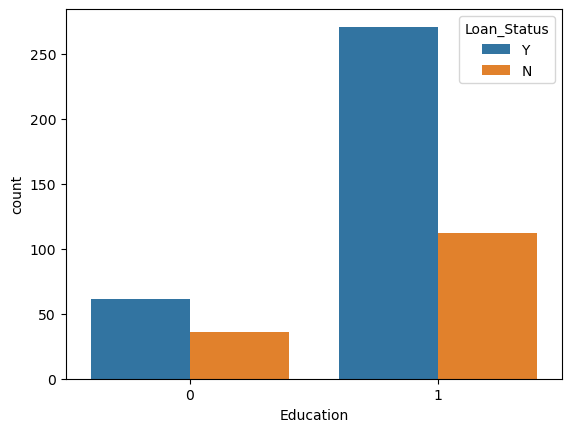

In [59]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Property_Area', ylabel='count'>

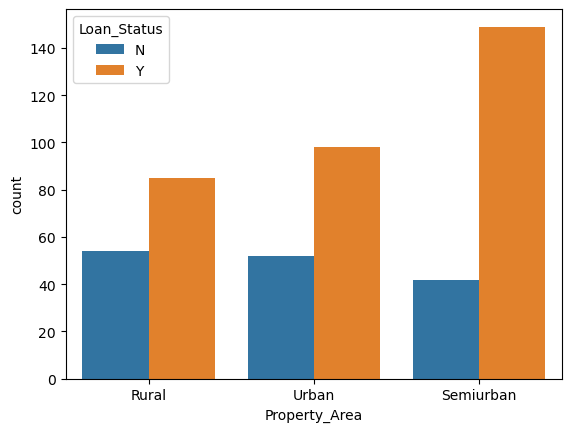

In [60]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

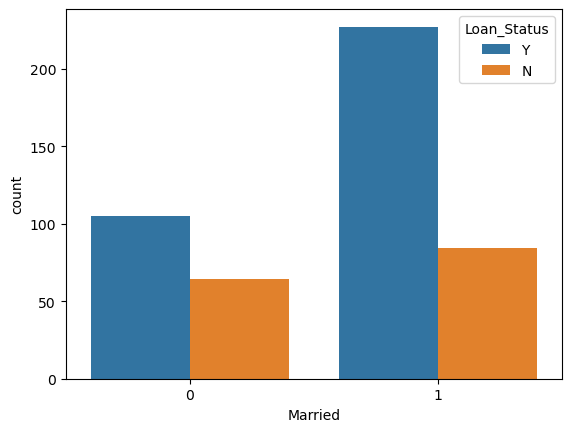

In [61]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

A histogram is a graphical representation of the distribution of a dataset. It is particularly useful for visualizing the frequency distribution of continuous numerical data. 

Text(0, 0.5, 'Frequency')

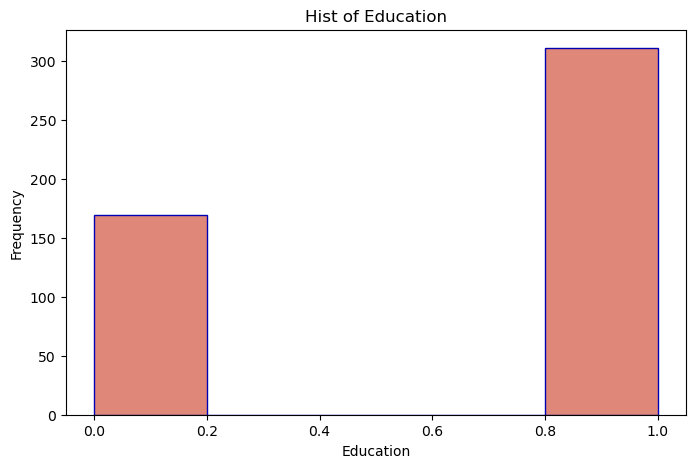

In [64]:
plt.figure(figsize=(8,5))
plt.hist(df['Married'],bins=5,color="#df8879",edgecolor="#0000b3")
plt.title('Hist of Education')
plt.xlabel('Education')
plt.ylabel('Frequency')

A boxplot, also known as a whisker plot, is a standardized way of displaying the distribution of a dataset based on a five-number summary: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. Boxplots are particularly useful for comparing distributions across different groups.

<Axes: ylabel='LoanAmount'>

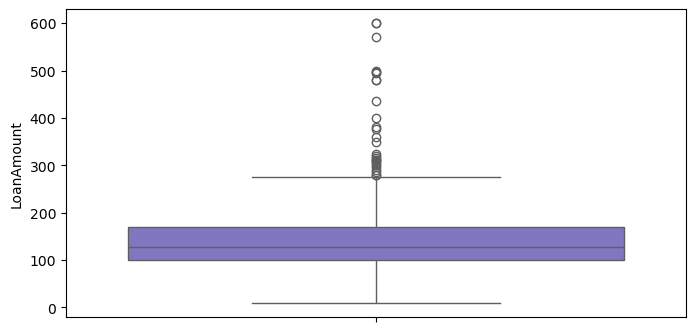

In [66]:
plt.figure(figsize=(8,4))
sns.boxplot(df['LoanAmount'],color="#776bcd")
 

A density plot is a data visualization technique that illustrates the distribution of a continuous variable. It provides a smoothed estimate of the probability density function of the variable, allowing for a clearer understanding of how the data points are distributed over a given range. 

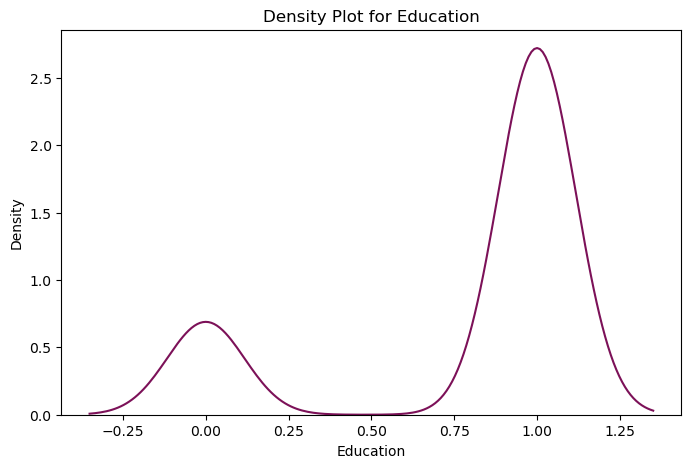

In [69]:
# Density Plot
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Education'],  color= "#7c1158")
plt.title('Density Plot for Education')
plt.show()

In [70]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,Y


Seperating the data

In [73]:
df2=pd.read_csv('loan-test.csv')

In [74]:
df2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [76]:
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=df['Loan_Status']

In [77]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         0        1          1          1              0             4583   
2         0        1          0          1              1             3000   
3         0        1          0          0              0             2583   
4         0        0          0          1              0             6000   
5         0        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       1        0          0          1              0             2900   
610       0        1          4          1              0             4106   
611       0        1          1          1              0             8072   
612       0        1          2          1              0             7583   
613       1        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [79]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [80]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (384, 11) (96, 11)


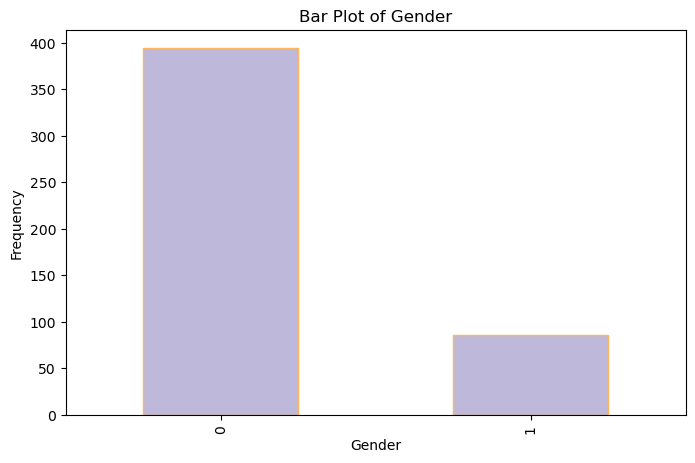

In [83]:
##categorical unordered variable
# Basic Bar Plot
plt.figure(figsize=(8, 5))
df['Gender'].value_counts().plot(kind='bar', color= "#beb9db", edgecolor="#ffb55a")


# Adding labels and title
plt.title('Bar Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

<Axes: ylabel='Education'>

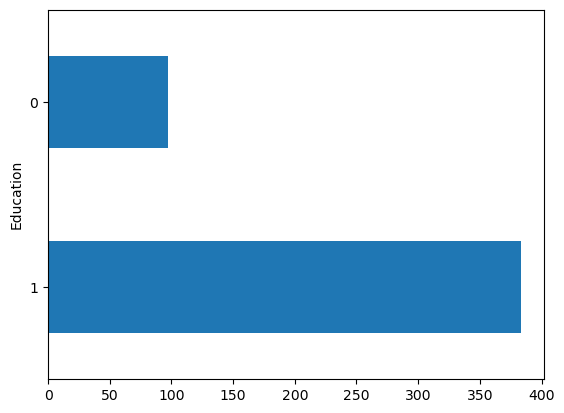

In [87]:
 df['Education'].value_counts().plot.barh()

In [91]:
 df['Education'].value_counts( normalize=True)

Education
1    0.797917
0    0.202083
Name: proportion, dtype: float64

In [92]:
df['Education'].value_counts()

Education
1    383
0     97
Name: count, dtype: int64

A pie chart is a circular statistical graphic that is divided into slices to illustrate proportions and percentages of a whole.

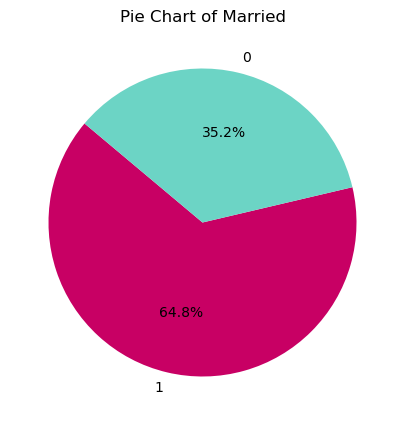

In [95]:

plt.figure(figsize=(8, 5))
df['Married'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=["#c80064", "#6cd4c5"], startangle=140)

# Adding labels and title
plt.title('Pie Chart of Married')
plt.ylabel('')
plt.show()